In [1]:
from packages import *

In [35]:
data_path = "../DATA/A-2/"
output_path = "outputs/A-2/"
filename1 = data_path + "A-2-1_shift45_500mV.csv"
filename2 = data_path + "A-2-2_100kHz_500mV.csv"
getrawdata1 = lambda : pd.read_csv(filename1)
getrawdata2 = lambda : pd.read_csv(filename2)

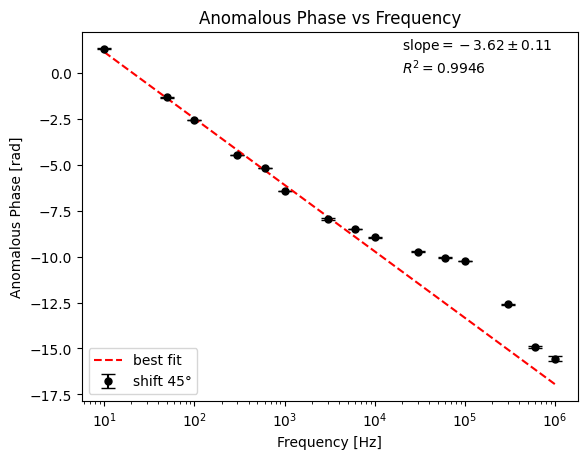

In [44]:
data1 = getrawdata1()
COLUMN_NAMES = ['frequency [Hz]', 'Result']
freq, result = data1[COLUMN_NAMES[0]], data1[COLUMN_NAMES[1]]
result = result * np.pi / 180
x = freq.unique()
y = np.zeros((len(x), 2))
for idx, val in enumerate(x):
  mask = freq == val
  y[idx, 0] = result[mask].mean()
  y[idx, 1] = result[mask].std()

mask = x < 1e4
x_fit = np.log10(x)[mask]
y_fit = (y[mask, 0])
linear = lambda x, a, b: a*x + b
popt, pcov = scipy.optimize.curve_fit(linear, x_fit, y_fit)
slope, intercept = popt
slope_err, intercept_err = np.sqrt(np.diag(pcov))
R2 = 1 - np.sum((y_fit - linear(x_fit, *popt))**2) / np.sum((y_fit - y_fit.mean())**2)


plt.text(2e4, 0, f'slope$={slope:.2f}\pm {slope_err:.2f}$\n$R^2 = {R2:.4f}$')

plt.errorbar(x, y[:, 0], yerr=y[:, 1], fmt='o', ms=5, 
            color='black', label=f'shift 45°',
            capsize=5, capthick=1)
plt.plot(x, linear(np.log10(x), *popt), 'r--', label=f'best fit',)
plt.legend(loc='lower left')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Anomalous Phase [rad]')
plt.title("Anomalous Phase vs Frequency")
plt.xscale('log')
plt.savefig(output_path + "Anomalous_Phase-Frequency.png")

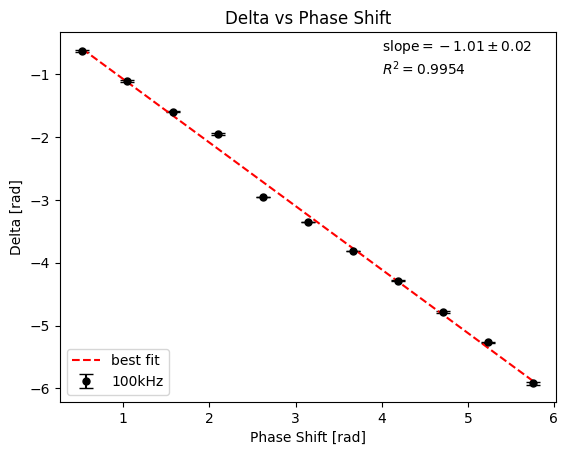

In [48]:
data2 = getrawdata2()
COLUMN_NAMES = ['set phase shift [degree]', 'Delta']
phase, delta = data2[COLUMN_NAMES[0]], data2[COLUMN_NAMES[1]]
phase = phase * np.pi / 180
delta = delta * np.pi / 180
x = phase.unique()
y = np.zeros((len(x), 2))
for idx, val in enumerate(x):
  mask = phase == val
  y[idx, 0] = delta[mask].mean()
  y[idx, 1] = delta[mask].std()

linear = lambda x, a, b: a*x + b
popt, pcov = scipy.optimize.curve_fit(linear, x, y[:, 0])
slope, intercept = popt; slope_err, intercept_err = np.sqrt(np.diag(pcov))
R2 = 1 - np.sum((y[:, 0] - linear(x, *popt))**2) / np.sum((y[:, 0] - y[:, 0].mean())**2)

plt.text(4, -1, f'slope$={slope:.2f}\pm {slope_err:.2f}$\n$R^2={R2:.4f}$')

plt.errorbar(x, y[:, 0], yerr=y[:, 1], fmt='o', ms=5,
            color='black', label='100kHz',
            capsize=5, capthick=1)
plt.plot(x, linear(x, *popt), 'r--', label='best fit')
plt.xlabel('Phase Shift [rad]')
plt.ylabel('Delta [rad]')
plt.title("Delta vs Phase Shift")
plt.legend(loc='lower left')
plt.savefig(output_path + "Delta-PhaseShift.png")